## Import 

In [21]:
# Python built-in libraries
from pathlib import Path

# Core Math and Visualization Libraries
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# sci-kit (sklearn) is a Machine Learning Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

## Step 1. Load the dataset

In [40]:
# In this cell, we use a built-in Python library to specify paths:

# CWD stands for current working directory
CWD = Path.cwd()
dataset_filepath = CWD.joinpath('dataset', 'SMSSpamCollection.txt')

In [50]:
data = pd.read_csv(dataset_filepath, encoding="utf-8", sep ="\t")
data.head()

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
types_of_values = data['label'].value_counts()

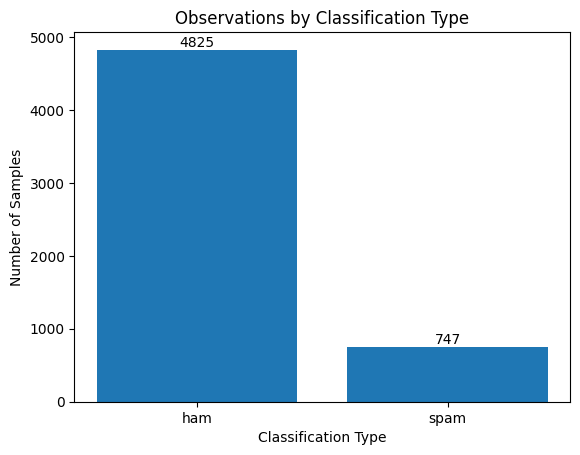

In [53]:
label_counts = data['label'].value_counts()

labels = label_counts.index
counts = label_counts.values

plt.bar(labels, counts)

plt.title("Observations by Classification Type")
plt.xlabel("Classification Type")
plt.ylabel("Number of Samples")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## Step 2. Preprocess the dataset and extract features using Bag of Words

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['label'], test_size=0.2, random_state=42, )

In [66]:
import string

def preprocess_text(text: str) -> str:
    """
    This method processes a text by lower the letters, removing punctuation, removing stopwords, and lemmatizing the words.

    """
    
    lowercase_text = text.lower()
    lowercase_text = lowercase_text.translate(str.maketrans('', '', string.punctuation))
    split_text = lowercase_text.split()

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in split_text if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemmatized_words)

In [67]:
preprocessed_X_train = X_train.apply(preprocess_text)
preprocessed_X_test = X_test.apply(preprocess_text)

In [85]:
def create_bag_of_words_model(preprocessed_X_train):
    """
    This method creates a bag of words model from a preprocessed text.

    """
    
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer
    

def create_tfidf_model(preprocessed_X_train):
    """
    This method creates a tfidf model from a preprocessed text.

    """
    
    vectorizer = TfidfVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer


In [69]:
x_train, vectorizer = create_bag_of_words_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

## Step 3. Train the model

In [ ]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [71]:
model = train_model(x_train, y_train)

## Step 4. Evaluate the model

In [72]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [73]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [74]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.99


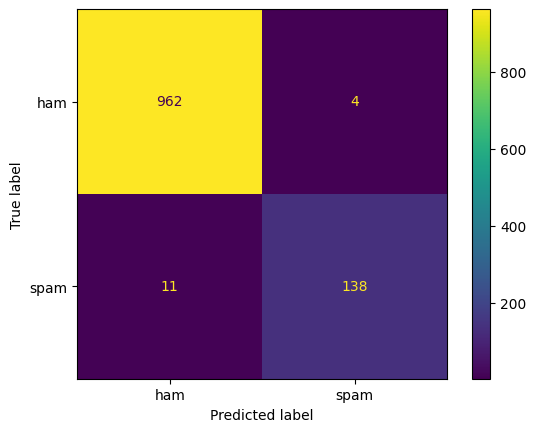

In [76]:
ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_).plot()

## Step 2 - Using TF IDF vectors to extract features

In [86]:
x_train, vectorizer = create_tfidf_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

## Step 3. Train the model

In [87]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [90]:
model = train_model(x_train, y_train)

## Step 4. Evaluate the model

In [91]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [92]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [93]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.97


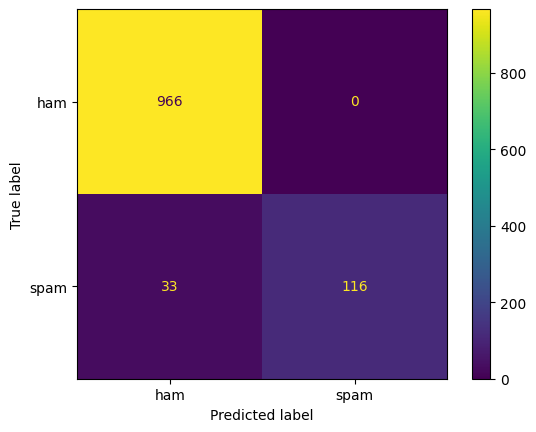

In [94]:
ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_).plot()